# Projet 07 : Effectuer une prédiction de revenus

---
**Importation des librairies**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import matplotlib.colors as plc
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
import modules_perso.sf_graphiques as sfg

---
## <font color=blue>Mission 4 : Modélisation du revenu des individus</font>

### 4.8.e. ANOVA du logarithme du revenu basée sur le logarithme du revenu moyen et l'indice de Gini du pays, sur le logarithme du revenu des parents et sur le coefficient d'élasticité

In [4]:
data = pd.read_csv("data_analyse12.csv", index_col=0)
data.head()

C:\Anaconda3\envs\Jupyter\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,ln_child_income,ln_revenu_moyen,gini_from_centiles,ln_parent_income,coef_elasticite
0,6.591534,8.004643,32.141019,6.591534,0.815874
1,6.591534,8.004643,32.141019,6.591534,0.815874
2,6.591534,8.004643,32.141019,6.591534,0.815874
3,6.591534,8.004643,32.141019,6.591534,0.815874
4,6.591534,8.004643,32.141019,6.591534,0.815874


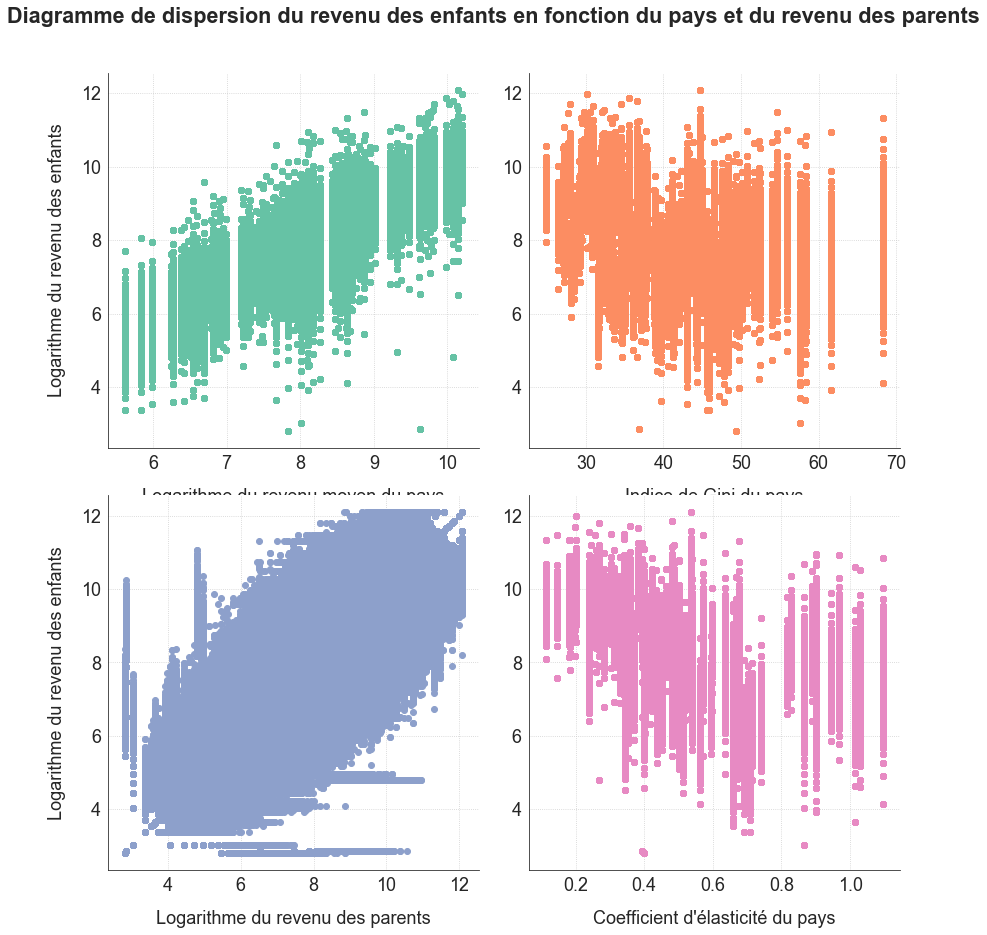

In [5]:
mygraph = sfg.MyGraph("Diagramme de dispersion du revenu des enfants en fonction du pays et du revenu des parents", nblin=2, nbcol=2, is_mono=False, figsize=(12,12))
mygraph.add_plot(data.ln_revenu_moyen, data.ln_child_income, label="", marker='o', color=mygraph.liste_couleurs[0], linestyle='', with_grid='both', grid_style=":", multi_index=1)
mygraph.add_plot(data.gini_from_centiles, data.ln_child_income, label="", marker='o', markeredgecolor=mygraph.liste_couleurs[1], markerfacecolor=mygraph.liste_couleurs[1], linestyle='', with_grid='both', grid_style=":", multi_index=2)
mygraph.add_plot(data.ln_parent_income, data.ln_child_income, label="", marker='o', color=mygraph.liste_couleurs[2], linestyle='', with_grid='both', grid_style=":", multi_index=3)
mygraph.add_plot(data.coef_elasticite, data.ln_child_income, label="", marker='o', color=mygraph.liste_couleurs[3], linestyle='', with_grid='both', grid_style=":", multi_index=4)
mygraph.set_axe('x', label="Logarithme du revenu moyen du pays", multi_index=1)
mygraph.set_axe('x', label="Indice de Gini du pays", multi_index=2)
mygraph.set_axe('x', label="Logarithme du revenu des parents", multi_index=3)
mygraph.set_axe('x', label="Coefficient d'élasticité du pays", multi_index=4)
mygraph.set_axe('y', label="Logarithme du revenu des enfants", multi_index=1)
mygraph.set_axe('y', label="Logarithme du revenu des enfants", multi_index=3)
fig, ax = mygraph.fig, mygraph.ax
plt.savefig("anova12_00_diagramme_dispersion.png")
plt.show()

In [6]:
anova = smf.ols(formula="ln_child_income ~ ln_revenu_moyen + gini_from_centiles + coef_elasticite + ln_parent_income", data=data).fit()

In [7]:
anova.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        ln_child_income   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                 5.514e+06
Date:                Mon, 14 Oct 2019   Prob (F-statistic):               0.00
Time:                        20:26:37   Log-Likelihood:            -5.3522e+06
No. Observations:             5642420   AIC:                         1.070e+07
Df Residuals:                 5642415   BIC:                         1.070e+07
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.2488      0.003     93.375      0.000       0.244       0.254
ln_revenu_moyen        0.4937      0.000   1119.440      0.000       0.493       0.495
gini_from_centiles    -0.0082   3.97e-05   -207.748      0.000      -0.008      -0.008
coef_elasticite       -0.0018      0.002     -1.074      0.283      -0.005       0.001
ln_parent_income       0.4994      0.000   1369.499      0.000       0.499       0.500
==============================================================================
Omnibus:                   354888.722   Durbin-Watson:                   0.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1600777.078
Skew:                          -0.103   Prob(JB):                         0.00
Kurtosis:                       5.601   Cond. No.                         435.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
table_anova = sm.stats.anova_lm(anova, typ=2)
table_anova.loc["total","sum_sq"] = table_anova.loc[:,"sum_sq"].sum()
table_anova.loc["total","df"] = table_anova.loc[:,"df"].sum()
table_anova["eta_squared"] = table_anova[:-2]["sum_sq"] / table_anova.loc["total","sum_sq"]
cmr = table_anova["sum_sq"][-1] / table_anova["df"][-1]
table_anova["omega_squared"] = (table_anova[:-2]["sum_sq"] - (table_anova[:-2]["df"] * cmr)) / (table_anova.loc["total","sum_sq"] + cmr)
table_anova

,sum_sq,df,F,PR(>F),eta_squared,omega_squared
ln_revenu_moyen,4.891541e+05,1.0,1.253145e+06,0.000000,1.421727e-01,1.421725e-01
gini_from_centiles,1.684678e+04,1.0,4.315910e+04,0.000000,4.896516e-03,4.896338e-03
coef_elasticite,4.504823e-01,1.0,1.154073e+00,0.282698,1.309327e-07,-4.629626e-08
ln_parent_income,7.320955e+05,1.0,1.875527e+06,0.000000,2.127836e-01,2.127834e-01
Residual,2.202467e+06,5642415.0,NaN,NaN,NaN,NaN
total,3.440564e+06,5642419.0,NaN,NaN,NaN,NaN


L'ANOVA conclut que le coefficient d'élasticité n'est pas significatif. De ce fait, cette variante est rejetée.